In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
#chechk for null values
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
df.shape

(703, 9)

In [6]:
#drop null values
df.dropna(inplace=True)

In [7]:
#independant featurd
x=df.iloc[:,:-1]

#Independant features
y=df.iloc[:,-1]

In [8]:
#co relation between parameters
# -.17 mean 17% probability that pm2.5 will decrease when H increase
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM 2.5
T,1.000000,0.885173,0.775227,-0.481617,-0.083672,0.304036,-0.047081,-0.013871,-0.381870
TM,0.885173,1.000000,0.515374,-0.665344,-0.078372,0.287929,-0.216516,-0.148051,-0.209552
Tm,0.775227,0.515374,1.000000,0.096352,0.017730,0.107315,0.223590,0.197512,-0.523892
H,-0.481617,-0.665344,0.096352,1.000000,0.289521,-0.287302,0.373491,0.294318,-0.178816
PP,-0.083672,-0.078372,0.017730,0.289521,1.000000,-0.093455,-0.055350,-0.033991,-0.109039
VV,0.304036,0.287929,0.107315,-0.287302,-0.093455,1.000000,0.025249,0.010176,-0.153117
V,-0.047081,-0.216516,0.223590,0.373491,-0.055350,0.025249,1.000000,0.786818,-0.395819
VM,-0.013871,-0.148051,0.197512,0.294318,-0.033991,0.010176,0.786818,1.000000,-0.340530
PM 2.5,-0.381870,-0.209552,-0.523892,-0.178816,-0.109039,-0.153117,-0.395819,-0.340530,1.000000


E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

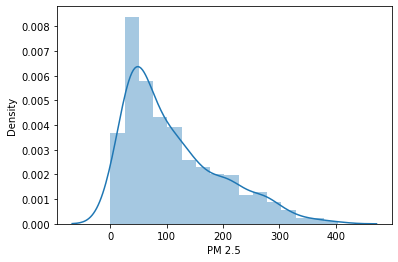

In [9]:
sns.distplot(y)

# split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

# Comparison Linear, Ridge and Lasso Regression


Linear Regressiom

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [13]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-4632.309383748411


# Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
# gridcv used to check multiple values at ones
from sklearn.model_selection import GridSearchCV  

In [24]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,60]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 60]},
             scoring='neg_mean_squared_error')

In [23]:
#best values among all

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-4620.313901953498


# Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [25]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,60]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1104018.8190296944, tolerance: 420.88725309763066
  model = cd_fast.enet_coordinate_descent(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 991505.7953631252, tolerance: 380.84829544201204
  model = cd_fast.enet_coordinate_descent(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1107106.5950923248, tolerance: 412.10048997202455
  model = cd_fast.enet_coordinate_descent(
E:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obje

{'alpha': 1}
-4617.130372137596


# Conclusion

## Lesso is givving slightly improved results

Model Evaluation

In [26]:
prediction=lasso_regressor.predict(x_test)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

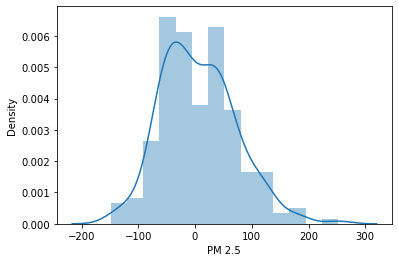

In [27]:
sns.distplot(y_test-prediction)

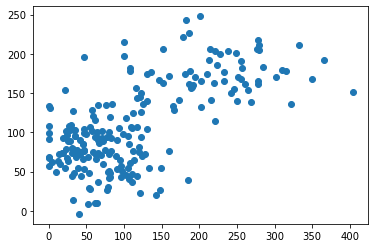

In [28]:
plt.scatter(y_test,prediction)

All of these are loss functions, 

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 52.845507324161005
MSE: 4338.459762836112
RMSE: 65.86698537838294


In [31]:
import pickle 

In [32]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)